# Título
## Preprocesamiento de Datos
### Leer un archivo de audio
### Tomar una muestra

In [28]:
import os
import matplotlib.pyplot as plt
from pydub import AudioSegment
import audiosegment as audio
import numpy as np
from scipy import signal
%matplotlib inline

Text(0, 0.5, 'Frecuencia (Hz)')

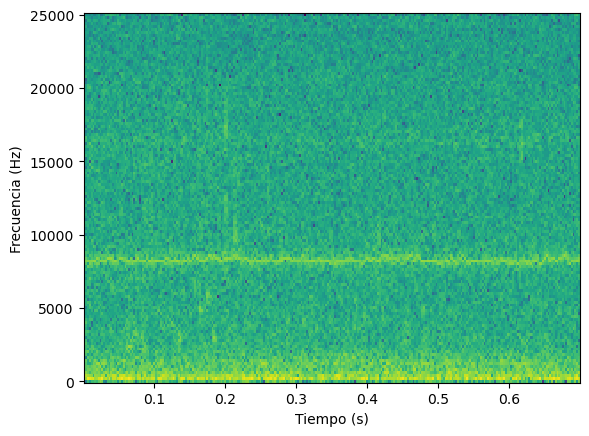

In [27]:
BIT_RATE = 50000
WORKING_DIR = os.getcwd()
AUDIO_FILE = f'{WORKING_DIR}/dataset_full/2ba79755986a6862dbdba0b6406093da.wav'
entity_sound = AudioSegment.from_file(AUDIO_FILE, start_second=149.342, duration=0.7)

# https://en.wikipedia.org/wiki/Decibel#Definitions
decibels = 43
sample_file = f'{WORKING_DIR}/processing_dir/sample.wav'
entity_amplified = entity_sound + decibels
entity_amplified.export(sample_file, format='wav', bitrate='50')

entity_sound = audio.from_file(sample_file)
freqs, times, amplitudes = entity_sound.spectrogram(window_length_s=0.005)
amplitudes = 10 * np.log10(amplitudes + 1e-9)

plt.pcolormesh(times, freqs, amplitudes)
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')


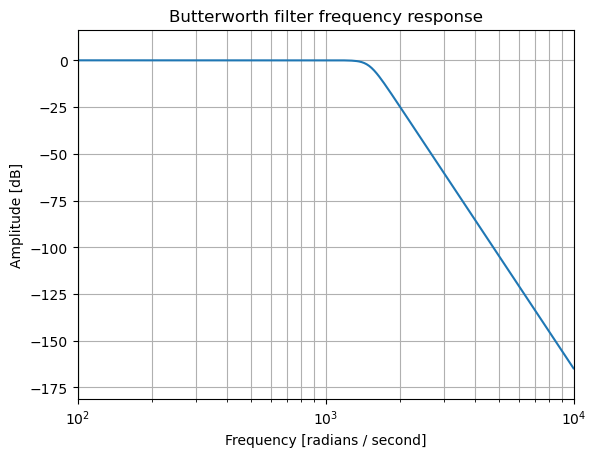

In [29]:
b1, a1 = signal.butter(10, 1500, 'low', analog=True)
w1, h1 = signal.freqs(b1, a1)

plt.semilogx(w1, 20 * np.log10(abs(h1)))
plt.title('Respuesta a frecuencias del filtro pasabajas Butterworth')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()


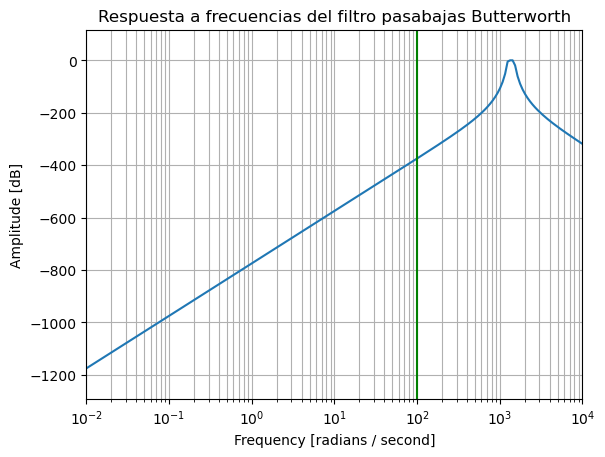

In [30]:
b1, a1 = signal.butter(10, [1250, 1500], 'bandpass', analog=True)
w1, h1 = signal.freqs(b1, a1)

plt.semilogx(w1, 20 * np.log10(abs(h1)))
plt.title('Respuesta a frecuencias del filtro pasabajas Butterworth')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()


In [7]:
signal.sosfilt(sos, )